In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

## Preparing my data

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [4]:
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')
print(train_labels[0])

1.0


## Building the network

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Validating our approach

In [ ]:
train_data_val = train_data[:10000]
train_data = train_data[10000:]

train_labels_val = train_labels[:10000]
train_labels = train_labels[10000:]

In [ ]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(train_data_val, train_labels_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.6929 - loss: 0.6117 - val_accuracy: 0.8644 - val_loss: 0.4193
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8832 - loss: 0.3663 - val_accuracy: 0.8709 - val_loss: 0.3437
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9151 - loss: 0.2650 - val_accuracy: 0.8871 - val_loss: 0.2920
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9322 - loss: 0.2094 - val_accuracy: 0.8828 - val_loss: 0.2911
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9454 - loss: 0.1700 - val_accuracy: 0.8865 - val_loss: 0.2808
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9577 - loss: 0.1432 - val_accuracy: 0.8846 - val_loss: 0.2871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9655 - loss: 0.1175 - val_accuracy: 0.8826 - val_loss: 0.3002
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9697 - loss: 0.1051 - val_accuracy: 0.8816 - 

## Plotting the Loss

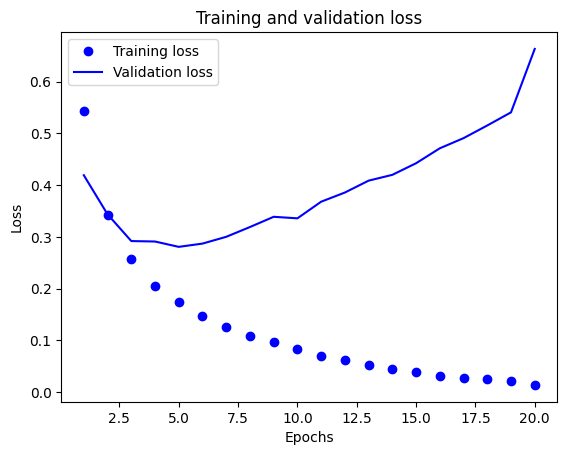

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the Accuracy

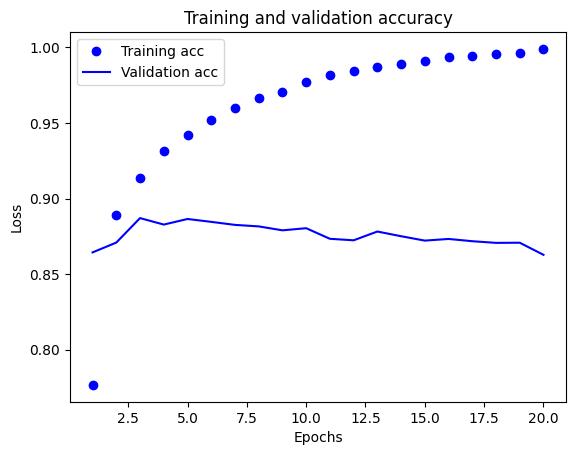

In [10]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training another model to avoid  overfitting

In [14]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))
model_2.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_2.fit(train_data, train_labels, epochs=4, batch_size=512)
results = model_2.evaluate(test_data, test_labels)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7031 - loss: 0.6220
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8896 - loss: 0.3763
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9142 - loss: 0.2686
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9247 - loss: 0.2168
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8741 - loss: 0.3057


In [12]:
model_2.predict(test_data)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.36113787],
       [0.9923133 ],
       [0.9779829 ],
       ...,
       [0.10239298],
       [0.19339824],
       [0.7083072 ]], dtype=float32)